# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 
The results show that in mice, Capomulin was able to reduce the size of tumors over time.  Ms. Mouse B128 was able to significantly reduce the size her tumor. 

While Capomulin and Ramicane both reduced tumor volume,  Capomulin showed the greatest overall decrease.

Katapil and Infubinol on the other hand were shown to cause an increase in tumor volume.

The correlation between the weight per mouse and the volume per tumor is .84.  This could indicate that the larger the mouse, the larger the tumor.  However, datmore data would be needed to make that claim accurately.  

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [143]:
# Show Data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [144]:
# Show Data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [145]:
# Checking the number of mice.
number_mice = len(combined_df["Mouse ID"].value_counts())
number_mice


249

In [165]:
# Gett the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_mice

array(['g989'], dtype=object)

In [166]:
# Optional: Get all the data for the duplicate mouse ID. 
optional_duplicate_mice = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
optional_duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [167]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean= combined_df[combined_df["Mouse ID"].isin(duplicate_mice)==False]
clean.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [168]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean["Mouse ID"].value_counts())
total_mice

248

## Summary Statistics

In [150]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean["Tumor Volume (mm3)"].groupby(clean["Drug Regimen"]).mean()
median = clean["Tumor Volume (mm3)"].groupby(clean["Drug Regimen"]).median()
variance = clean["Tumor Volume (mm3)"].groupby(clean["Drug Regimen"]).var()
standard_deviation = clean["Tumor Volume (mm3)"].groupby(clean["Drug Regimen"]).std()
SEM = clean["Tumor Volume (mm3)"].groupby(clean["Drug Regimen"]).sem()

summary_table = pd.DataFrame({"Mean Tumor Volume" : mean,
               "Median Tumor Volume" :median,
               "Tumor Volume Variance" : variance,
               "Tumor Volume Std. Dev" : standard_deviation,
               "Tumor Volume Std. Err." : sem})

summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [169]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregate = clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])


## Bar and Pie Charts

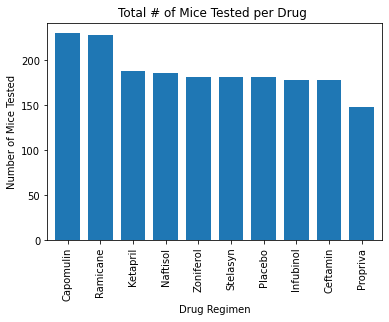

In [170]:
# Graph a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

all_mice = clean.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

all_mice.plot(kind="bar", width=.75),
plt.title("Total # of Mice Tested per Drug ")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()


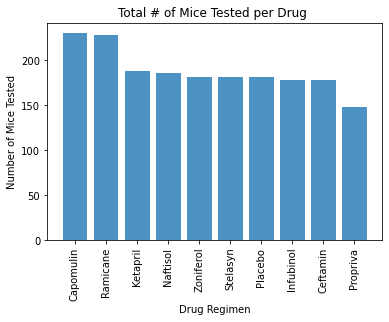

In [173]:
# Do the same thing with pyplot 
# Indices
x = all_mice.index
y = all_mice.values

# Make bar graph
plt.bar(x, y, alpha=.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total # of Mice Tested per Drug ")
plt.xticks(rotation="vertical")

#show plot 
plt.show()

In [174]:
# Groupby to find the # of Mickeys and Minnies 
groupby_gender = merge_data.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

# DF for Mickeys and Minnies
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# % of M/F
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# % Format
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


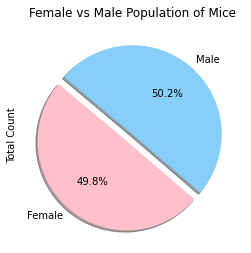

In [175]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#plot = name of the data frame .plot.pie (sumplots true) legend(frameon = False)

colors = [ 'pink','lightskyblue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(title=("Female vs Male Population of Mice"),y='Total Count', figsize=(4.1,4.1),colors = colors, startangle=140, explode = explode, legend = False, shadow = True, autopct="%1.1f%%")

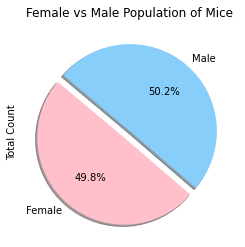

In [176]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# #labels for chart
labels = [ "Female", "Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

# Colors
colors = [ 'pink','lightskyblue']

# Set which section to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.ylabel("Total Count")
plt.title("Female vs Male Population of Mice")




plt.show()


## Quartiles, Outliers and Boxplots

In [178]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean.groupby("Mouse ID")["Timepoint"].max()
timepoint= pd.DataFrame(timepoint)
# Merge to get tumor valume at turnpoit
merged_tumor = pd.merge(timepoint,clean, on=("Mouse ID", "Timepoint"), how="left")

merged_tumor



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [179]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_tumor.loc[merged_tumor["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{treatment} Regimen")
    print(f"The Potential Outliers are: {round(lower_bound,2)},{round(upper_bound,2)}")
    print(f"----------------------------------------------------------")

Capomulin Regimen
The Potential Outliers are: 20.7,51.83
----------------------------------------------------------
Ramicane Regimen
The Potential Outliers are: 17.91,54.31
----------------------------------------------------------
Infubinol Regimen
The Potential Outliers are: 36.83,82.74
----------------------------------------------------------
Ceftamin Regimen
The Potential Outliers are: 25.36,87.67
----------------------------------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x25609b36fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x25609b2bb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2560942e148>,
 'medians': [<matplotlib.lines.Line2D at 0x25609b25688>,
 'fliers': [<matplotlib.lines.Line2D at 0x25609b25c48>,
 'means': []}

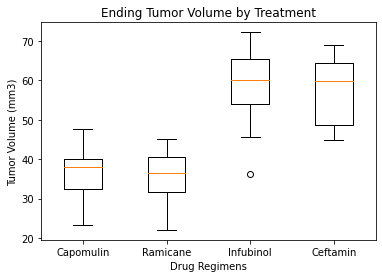

In [180]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_title("Ending Tumor Volume by Treatment")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel( "Drug Regimens")

ax.boxplot(tumor_vol_data, labels = treatments)

## Line and Scatter Plots

Text(0.5, 1.0, 'Volume of Tumor vs Timepoint for Mouse(b128)')

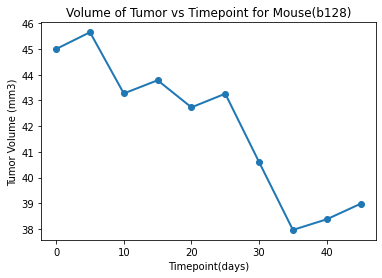

In [181]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin = clean.loc[clean["Mouse ID"] == "b128"]

x_axis = Capomulin["Timepoint"]

y_axix = Capomulin["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axix, linewidth=2, marker="o" )

plt.xlabel("Timepoint(days)")

plt.ylabel("Tumor Volume (mm3)")

plt.title("Volume of Tumor vs Timepoint for Mouse(b128)")



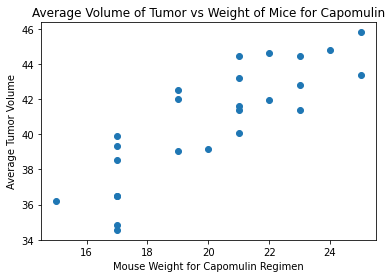

In [182]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


# DF copy
Capom = clean.loc[clean["Drug Regimen"] == "Capomulin"]

# Find mean by mouse
cap_avg = Capom.groupby("Mouse ID").mean()

mice_weight = cap_avg["Weight (g)"]
mice_tumor =  cap_avg["Tumor Volume (mm3)"]

# Make the graph
plt.scatter(mice_weight, mice_tumor, marker="o" )

plt.xlabel("Mouse Weight for Capomulin Regimen")

plt.ylabel("Average Tumor Volume")

plt.title("Average Volume of Tumor vs Weight of Mice for Capomulin")

plt.show()

## Correlation and Regression

The correlation coefficient between mouse and average tumor volume is 0.84


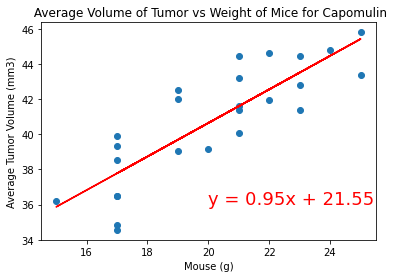

In [185]:
# Calculate the correlation coefficient & linear regression model for mouse weight & avg tumor vol for Capomulin 

# DF copy
capo = clean.loc[clean["Drug Regimen"] == "Capomulin"]

# Find Mean
capo_mean = capo.groupby("Mouse ID").mean()

#Generate a scatter plot of average tumor volume vs. mouse weight for the Capom
mice_weight = capo_mean["Weight (g)"]
mice_tumor =  capo_mean["Tumor Volume (mm3)"]


# Print 
print(f"The correlation coefficient between mouse and average tumor volume is {round(st.pearsonr(mice_weight,mice_tumor)[0],2)}")

# Line regress
(slope, intercept, rvalue, pvalue, stderr) = linregress(mice_weight, mice_tumor)
regress_values = mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Graph
plt.scatter(mice_weight, mice_tumor, marker="o" )
plt.plot(mice_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=18,color="red")
plt.xlabel("Mouse (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(" Average Volume of Tumor vs Weight of Mice for Capomulin")


#Show
plt.show()
